In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Data Exploration

In [24]:
# Load CSV file
df = pd.read_csv('/content/archive.zip')

In [25]:
# View the first 5 rows
print(df.head())

         date    open    high     low   close     volume  profit or not
0  12-12-1980  0.1003  0.1007  0.1003  0.1003  469033600              0
1  15-12-1980  0.0955  0.0955  0.0951  0.0951  175884800              1
2  16-12-1980  0.0885  0.0885  0.0881  0.0881  105728000              1
3  17-12-1980  0.0902  0.0907  0.0902  0.0902   86441600              0
4  18-12-1980  0.0929  0.0933  0.0929  0.0929   73449600              0


In [26]:
# View the last 5 rows
print(df.tail())


             date     open     high     low   close     volume  profit or not
10554  24-10-2022  147.185  150.230  146.00  149.45   75569074              0
10555  25-10-2022  150.090  152.490  149.36  152.34   73583421              0
10556  26-10-2022  150.960  151.990  148.04  149.35   87769611              1
10557  27-10-2022  148.070  149.046  144.13  144.80  108110875              1
10558  28-10-2022  148.200  157.500  147.82  155.74  162857942              0


In [27]:
# Summary of data types and non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10559 entries, 0 to 10558
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           10559 non-null  object 
 1   open           10559 non-null  float64
 2   high           10559 non-null  float64
 3   low            10559 non-null  float64
 4   close          10559 non-null  float64
 5   volume         10559 non-null  int64  
 6   profit or not  10559 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 577.6+ KB


In [28]:
# Basic statistical data
df.describe()


,open,high,low,close,volume,profit or not
count,10559.000000,10559.000000,10559.000000,10559.000000,1.055900e+04,10559.000000
mean,15.308827,15.483090,15.139373,15.318012,3.263275e+08,0.476466
std,33.973113,34.385796,33.580974,34.000790,3.201156e+08,0.499469
min,0.038800,0.038800,0.038400,0.038400,1.001504e+06,0.000000
25%,0.236800,0.242500,0.231650,0.236900,1.219792e+08,0.000000
50%,0.400200,0.406600,0.393000,0.399300,2.159780e+08,0.000000
75%,13.652700,13.783300,13.504000,13.647150,4.074518e+08,1.000000
max,181.877900,182.186600,178.382400,181.260500,2.147484e+09,1.000000


In [29]:
# Check for missing values

# Check total missing values per column
print(df.isnull().sum())

date             0
open             0
high             0
low              0
close            0
volume           0
profit or not    0
dtype: int64


In [30]:
# Check if any value is missing
print(df.isnull().values.any())


False


In [31]:
# Check for duplicate values

# Total number of duplicated rows
print(df.duplicated().sum())

0


In [32]:
# Remove duplicates if needed
df = df.drop_duplicates()


In [33]:
# Check Column Names
print(df.columns)


Index(['date', 'open', 'high', 'low', 'close', 'volume', 'profit or not'], dtype='object')


In [34]:
# check unique values
print(df['date'].unique())


['12-12-1980' '15-12-1980' '16-12-1980' ... '26-10-2022' '27-10-2022'
 '28-10-2022']


In [35]:
print(df['open'].unique())

[1.0030e-01 9.5500e-02 8.8500e-02 ... 1.5096e+02 1.4807e+02 1.4820e+02]


In [36]:
print(df['high'].unique())

[1.00700e-01 9.55000e-02 8.85000e-02 ... 1.51990e+02 1.49046e+02
 1.57500e+02]


In [37]:
print(df['low'].unique())

[1.0030e-01 9.5100e-02 8.8100e-02 ... 1.4804e+02 1.4413e+02 1.4782e+02]


In [38]:
print(df['close'].unique())

[1.0030e-01 9.5100e-02 8.8100e-02 ... 1.4935e+02 1.4480e+02 1.5574e+02]


In [39]:
print(df['volume'].unique())

[469033600 175884800 105728000 ...  87769611 108110875 162857942]


In [40]:
print(df['profit or not'].unique())

[0 1]


Basic visualization

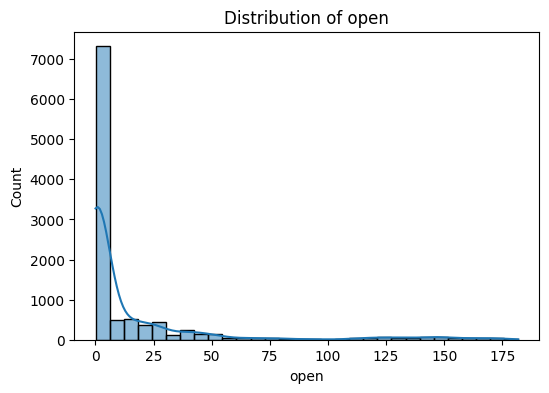

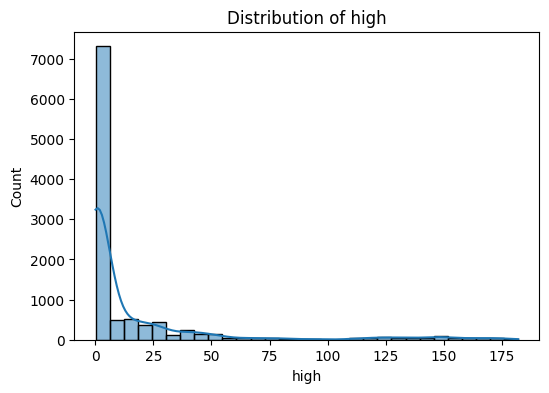

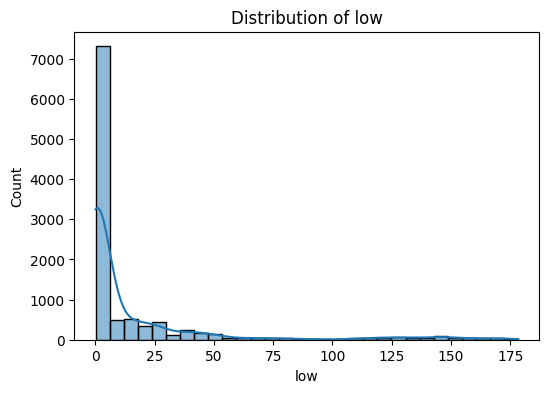

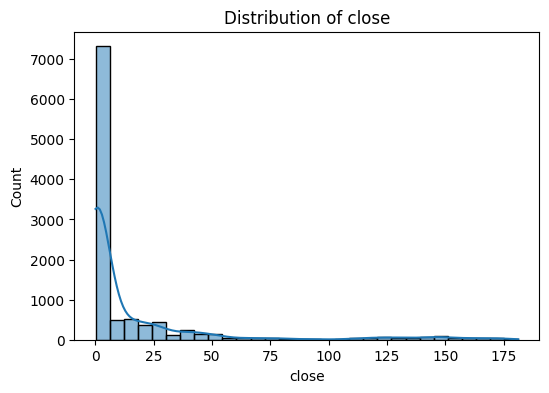

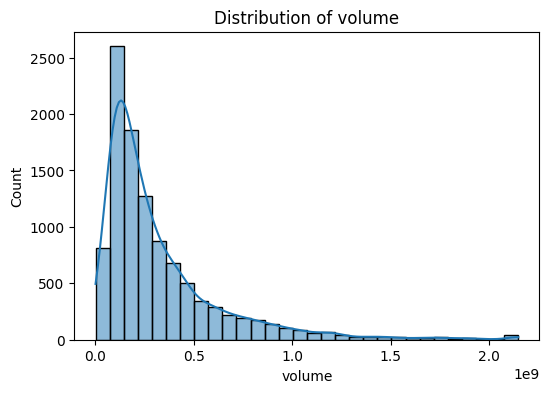

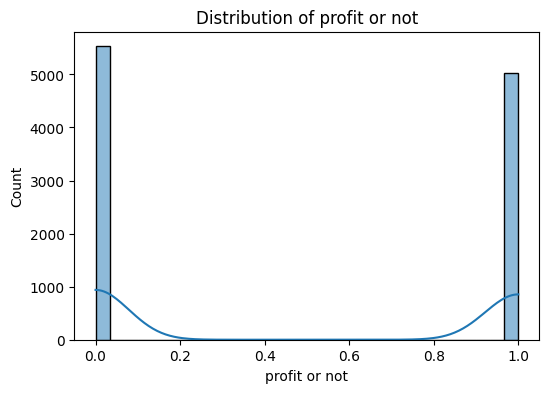

In [41]:
# Numerical Features

num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

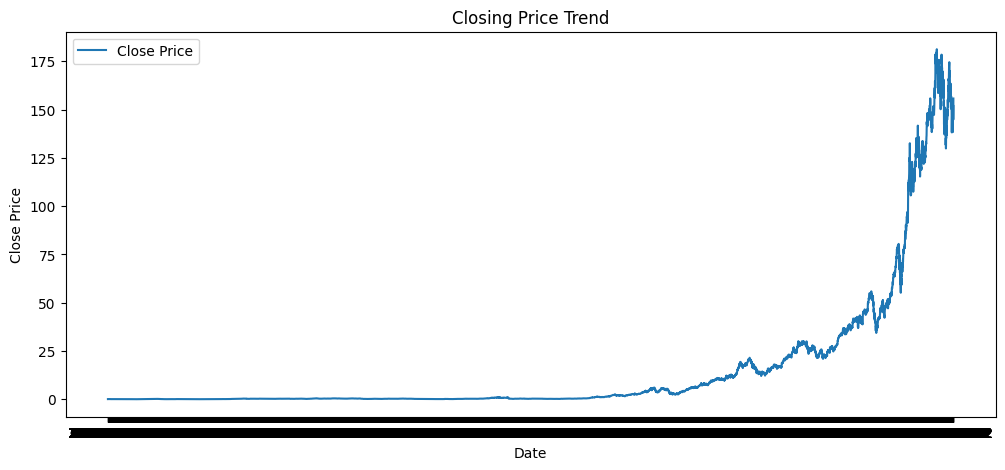

In [21]:
# Trend plot
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['close'], label="Close Price")
plt.title("Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

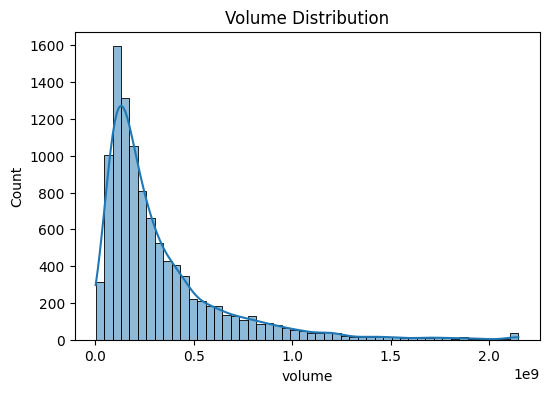

In [44]:
# Volume distribution
plt.figure(figsize=(6,4))
sns.histplot(df['volume'], bins=50, kde=True)
plt.title("Volume Distribution")
plt.show()

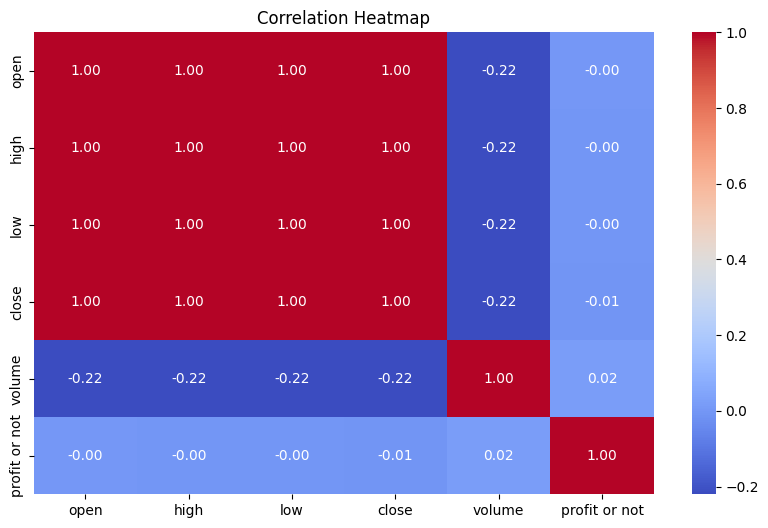

In [47]:
# Correlation Analysis

plt.figure(figsize=(10, 6))
# Drop non-numeric columns before calculating correlation
sns.heatmap(df.drop(columns=['date']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

A scatter plot to see the relationship between the 'open' and 'close' prices.

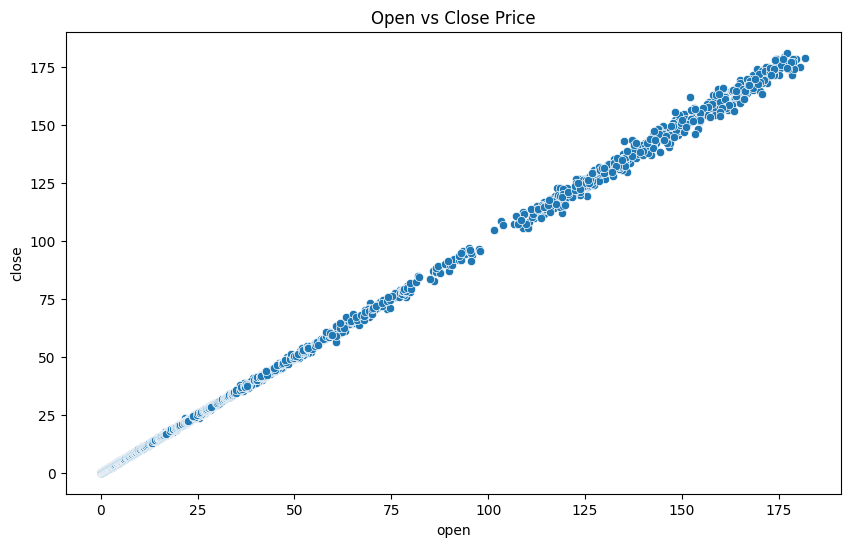

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='open', y='close')
plt.title('Open vs Close Price')
plt.show()

 visualize the 'volume' over time. We'll need to convert the 'date' column to datetime objects first.

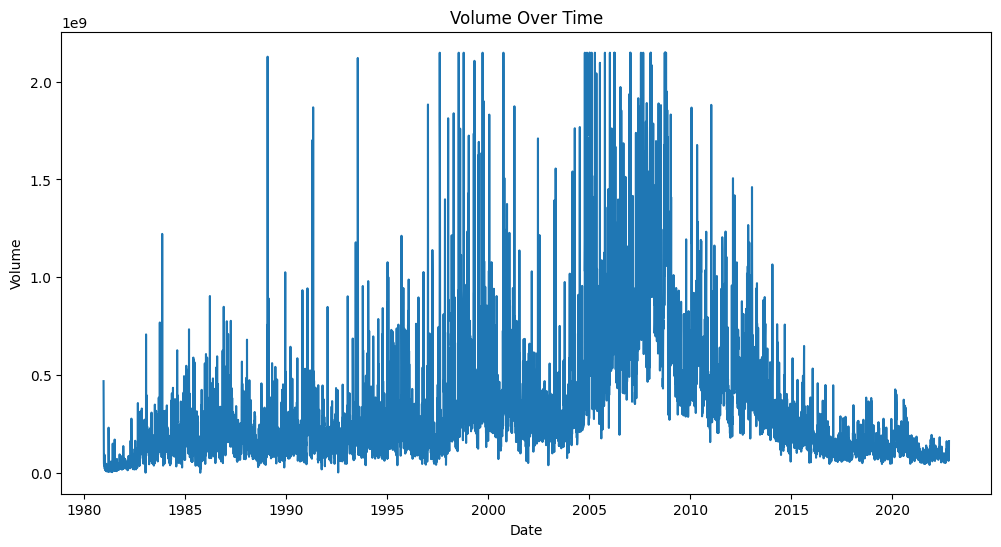

In [48]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='volume')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

Finally, let's look at the distribution of 'profit or not' using a bar plot.

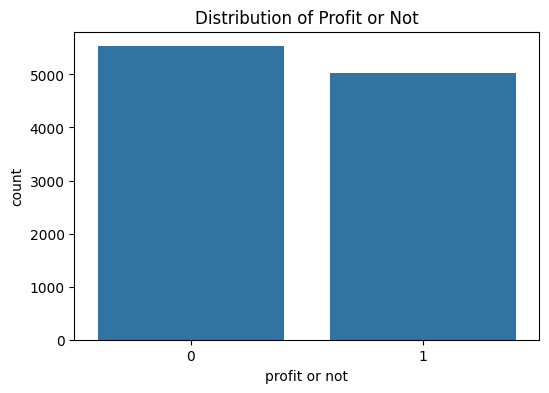

In [49]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='profit or not')
plt.title('Distribution of Profit or Not')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay


In [87]:
# Feature preparation
# ------------------------------
X = df[['open', 'high', 'low', 'close', 'volume']]
y = df['profit or not']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # keep time order
)


In [88]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [54]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n===== Random Forest Report =====")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))



===== Random Forest Report =====
              precision    recall  f1-score   support

           0       0.55      0.74      0.63      1123
           1       0.51      0.30      0.38       989

    accuracy                           0.54      2112
   macro avg       0.53      0.52      0.50      2112
weighted avg       0.53      0.54      0.51      2112

ROC AUC: 0.5148733125826657


LightGBM Model (Profit or Not)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[32]	training's auc: 0.879045	valid_1's auc: 0.534474

===== LightGBM Report =====
              precision    recall  f1-score   support

         0.0       0.60      0.45      0.52       453
         1.0       0.49      0.64      0.56       377

    accuracy                           0.54       830
   macro avg       0.55      0.55      0.54       830
weighted avg       0.55      0.54      0.54       830

ROC AUC: 0.534473975442233


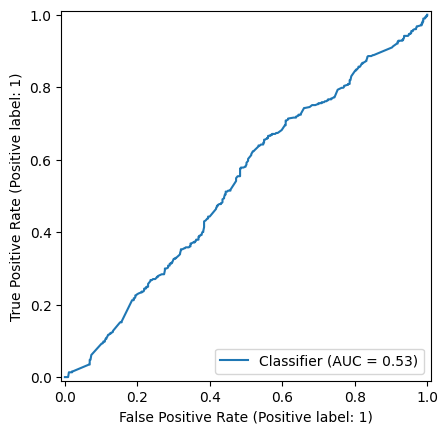

In [55]:

# LightGBM Model (Profit or Not)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay

# 1. Load dataset
df = pd.read_csv("/content/archive.zip")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.sort_values('date')

# 2. Feature Engineering
df['target'] = df['profit or not'].shift(-1)

for lag in [1,2,3,5,7,14]:
    df[f'close_lag_{lag}'] = df['close'].shift(lag)
    df[f'volume_lag_{lag}'] = df['volume'].shift(lag)

df['roll_mean_5'] = df['close'].shift(1).rolling(window=5).mean()
df['roll_std_5'] = df['close'].shift(1).rolling(window=5).std()
df['roll_mean_10'] = df['close'].shift(1).rolling(window=10).mean()
df['roll_std_10'] = df['close'].shift(1).rolling(window=10).std()

df = df.dropna().reset_index(drop=True)

# 3. Features & Target
X = df.drop(columns=['date', 'profit or not', 'target'])
y = df['target']

split_index = int(len(df)*0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# 4. Train LightGBM
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': -1
}

model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_test],
                  num_boost_round=500, callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=50)])

# 5. Evaluate
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_class = (y_pred > 0.5).astype(int)

print("\n===== LightGBM Report =====")
print(classification_report(y_test, y_pred_class))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

LSTM Model

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5197 - loss: 0.6919 - val_accuracy: 0.5075 - val_loss: 0.6931
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5241 - loss: 0.6925 - val_accuracy: 0.5075 - val_loss: 0.6934
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5383 - loss: 0.6908 - val_accuracy: 0.5120 - val_loss: 0.6929
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5357 - loss: 0.6913 - val_accuracy: 0.5120 - val_loss: 0.6929
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5216 - loss: 0.6924 - val_accuracy: 0.5075 - val_loss: 0.6931
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5370 - loss: 0.6912 - val_accuracy: 0.5060 - val_loss: 0.6929
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5202 - loss: 0.6926 - val_accuracy: 0.5075 - val_loss: 0.6930
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5426 - loss: 0.6902 - val_accuracy: 0.4970 - val_loss: 0.

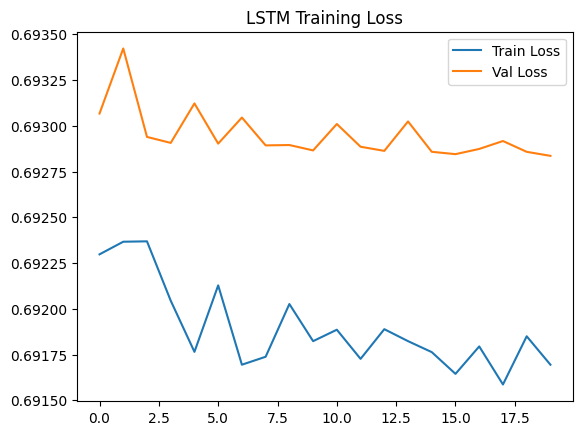

In [56]:
# LSTM Model (Profit or Not)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 1. Load dataset
df = pd.read_csv("/content/archive.zip")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.sort_values('date')

# 2. Define target
df['target'] = df['profit or not'].shift(-1)
df = df.dropna().reset_index(drop=True)

# 3. Features (use OHLCV)
features = ['open', 'high', 'low', 'close', 'volume']
X = df[features].values
y = df['target'].values

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 4. Reshape for LSTM [samples, timesteps, features]
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i+time_steps)])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y, time_steps)

# Train-test split (time-aware)
split_index = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]

# 5. Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# 6. Train (with epochs)
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 7. Evaluate
y_pred = model.predict(X_test).ravel()
y_pred_class = (y_pred > 0.5).astype(int)

print("\n===== LSTM Report =====")
print(classification_report(y_test, y_pred_class))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

# Plot training history
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("LSTM Training Loss")
plt.show()


Feature Engineering Function

In [57]:
import pandas as pd
import numpy as np

def add_technical_indicators(df):
    # Ensure sorted by date
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.sort_values('date').reset_index(drop=True)

    # 1. Daily return
    df['return'] = df['close'].pct_change()

    # 2. Moving Averages
    df['ma5'] = df['close'].rolling(window=5).mean()
    df['ma10'] = df['close'].rolling(window=10).mean()

    # 3. Exponential Moving Averages
    df['ema5'] = df['close'].ewm(span=5, adjust=False).mean()
    df['ema10'] = df['close'].ewm(span=10, adjust=False).mean()

    # 4. Rolling Volatility
    df['volatility_10'] = df['return'].rolling(window=10).std()

    # 5. RSI (14)
    delta = df['close'].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=14).mean()
    avg_loss = pd.Series(loss).rolling(window=14).mean()
    rs = avg_gain / (avg_loss + 1e-10)
    df['rsi14'] = 100 - (100 / (1 + rs))

    # 6. MACD & Signal
    ema12 = df['close'].ewm(span=12, adjust=False).mean()
    ema26 = df['close'].ewm(span=26, adjust=False).mean()
    df['macd'] = ema12 - ema26
    df['macd_signal'] = df['macd'].ewm(span=9, adjust=False).mean()

    # Drop NaN values from rolling calculations
    df = df.dropna().reset_index(drop=True)

    return df


In [58]:
!pip install ta-lib

LightGBM with Technical Indicators

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[59]	training's auc: 0.890196	valid_1's auc: 0.540763

===== LightGBM Report =====
              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57       453
         1.0       0.49      0.50      0.49       377

    accuracy                           0.53       830
   macro avg       0.53      0.53      0.53       830
weighted avg       0.54      0.53      0.54       830

ROC AUC: 0.5407627312171729


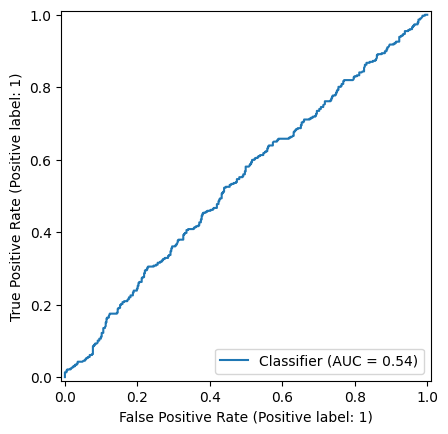

In [59]:
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import talib


# Load & preprocess
df = pd.read_csv("/content/archive.zip")
df = add_technical_indicators(df)

# Define target (shift to predict next day)
df['target'] = df['profit or not'].shift(-1)
df = df.dropna().reset_index(drop=True)

# Features & Target
X = df.drop(columns=['date', 'profit or not', 'target'])
y = df['target']

# Time-aware train/test split
split_index = int(len(df)*0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# LightGBM
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test)

params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': -1
}

model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_test],
                  num_boost_round=500, callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=50)])


# Predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_class = (y_pred > 0.5).astype(int)

print("\n===== LightGBM Report =====")
print(classification_report(y_test, y_pred_class))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()


LightGBM with Technical Indicators

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.5055 - loss: 0.6954 - val_accuracy: 0.5068 - val_loss: 0.6933
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.5237 - loss: 0.6920 - val_accuracy: 0.5068 - val_loss: 0.6940
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5394 - loss: 0.6916 - val_accuracy: 0.5144 - val_loss: 0.6930
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5232 - loss: 0.6929 - val_accuracy: 0.5113 - val_loss: 0.6930
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5233 - loss: 0.6921 - val_accuracy: 0.5113 - val_loss: 0.6931
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5456 - loss: 0.6892 - val_accuracy: 0.4932 - val_loss: 0.6989
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5217 - loss: 0.6925 - val_accuracy: 0.4977 - val_loss: 0.6929
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5466 - loss: 0.6889 - val_accuracy: 0.5144 - 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


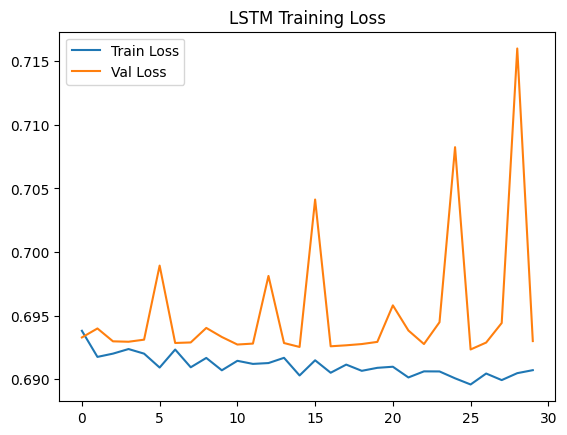

In [60]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import classification_report, roc_auc_score

# Load & preprocess
df = pd.read_csv("/content/archive.zip")
df = add_technical_indicators(df)

# Define target
df['target'] = df['profit or not'].shift(-1)
df = df.dropna().reset_index(drop=True)

# Features (OHLCV + Indicators)
features = [c for c in df.columns if c not in ['date','profit or not','target']]
X = df[features].values
y = df['target'].values

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert to sequences
def create_sequences(X, y, time_steps=20):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i+time_steps)])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 20
X_seq, y_seq = create_sequences(X_scaled, y, time_steps)

# Train-test split
split_index = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]

# LSTM Model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train
history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                    validation_split=0.2, verbose=1)

# Evaluate
y_pred = model.predict(X_test).ravel()
y_pred_class = (y_pred > 0.5).astype(int)

print("\n===== LSTM Report =====")
print(classification_report(y_test, y_pred_class))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

# Plot Training Loss
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("LSTM Training Loss")
plt.show()


In [61]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv("/content/archive.zip")

# Make sure 'date' is sorted
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.sort_values('date').reset_index(drop=True)

# 1. Calculate daily returns
df['return'] = df['close'].pct_change()

# 2. Create binary target (1 if next day's return > 0.5%)
threshold = 0.005  # 0.5%
df['target'] = (df['return'].shift(-1) > threshold).astype(int)

# 3. Drop missing values
df = df.dropna().reset_index(drop=True)

print(df[['date','close','return','target']].head(15))


         date   close    return  target
0  1981-01-04  0.0846 -0.156530       1
1  1981-01-05  0.0990  0.170213       1
2  1981-01-06  0.1156  0.167677       0
3  1981-01-07  0.0898 -0.223183       0
4  1981-01-09  0.0746 -0.169265       0
5  1981-01-10  0.0532 -0.286863       1
6  1981-01-12  0.0650  0.221805       1
7  1981-02-01  0.1203  0.850769       0
8  1981-02-02  0.0929 -0.227764       0
9  1981-02-03  0.0929  0.000000       0
10 1981-02-04  0.0920 -0.009688       1
11 1981-02-06  0.1099  0.194565       0
12 1981-02-07  0.0898 -0.182894       0
13 1981-02-09  0.0759 -0.154788       0
14 1981-02-10  0.0576 -0.241107       1


In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

# ==============================
# 1. Load & Prepare Data
# ==============================
df = pd.read_csv("/content/archive.zip")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.sort_values('date').reset_index(drop=True)

# Daily return
df['return'] = df['close'].pct_change()

# Binary target: 1 if tomorrow’s return > 0.5%
threshold = 0.005
df['target'] = (df['return'].shift(-1) > threshold).astype(int)

# Drop NaN rows
df = df.dropna().reset_index(drop=True)

# Features: you can expand with your technical indicators here
features = [col for col in df.columns if col not in ['date','target']]
X = df[features]
y = df['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# ==============================
# 2. LightGBM Model
# ==============================
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

lgb_model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_test],
    num_boost_round=200,
    callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=50)]
)

y_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
roc_lgb = roc_auc_score(y_test, y_pred_lgb)
print(f"LightGBM ROC AUC: {roc_lgb:.4f}")

# ==============================
# 3. LSTM Model
# ==============================
# Scale features for LSTM
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for sequences
time_steps = 20
def create_sequences(X, y, time_steps=20):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y.values, time_steps)

# Train/test split (aligned with original)
split_index = int(len(X_seq) * 0.8)
X_train_seq, X_test_seq = X_seq[:split_index], X_seq[split_index:]
y_train_seq, y_test_seq = y_seq[:split_index], y_seq[split_index:]

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(time_steps, X_seq.shape[2]), return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation="sigmoid"))

lstm_model.compile(loss="binary_crossentropy", optimizer=Adam(0.001), metrics=["AUC"])

history = lstm_model.fit(
    X_train_seq, y_train_seq,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Predictions
y_pred_lstm = lstm_model.predict(X_test_seq).ravel()
roc_lstm = roc_auc_score(y_test_seq, y_pred_lstm)
print(f"LSTM ROC AUC:    {roc_lstm:.4f}")

# ==============================
# 4. Compare Results
# ==============================
print("\nModel Comparison:")
print(f"LightGBM ROC AUC: {roc_lgb:.4f}")
print(f"LSTM ROC AUC:    {roc_lstm:.4f}")

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	training's auc: 0.834267	valid_1's auc: 0.583239
LightGBM ROC AUC: 0.5832
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - AUC: 0.4878 - loss: 0.6924 - val_AUC: 0.4841 - val_loss: 0.6860
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - AUC: 0.5523 - loss: 0.6894 - val_AUC: 0.4863 - val_loss: 0.6829
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - AUC: 0.5625 - loss: 0.6876 - val_AUC: 0.4936 - val_loss: 0.6823
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - AUC: 0.5672 - loss: 0.6855 - val_AUC: 0.4975 - val_loss: 0.6818
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - AUC: 0.5884 - loss: 0.6812 - val_AUC: 0.5023 - val_loss: 0.6842
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - AUC: 0.5884 - loss: 0.6840 - val_AUC: 0.5172 - val_loss: 0.6813
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - AUC: 0.5953 - loss: 0.6825 - val_AUC: 0.5260 - val_loss: 0.6810
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - AUC: 0.5850 - loss: 0.6835 - val_AUC: 0.5275 - val_loss: 0.6817
Epoch 9/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - AUC: 0.6022 - loss: 0.

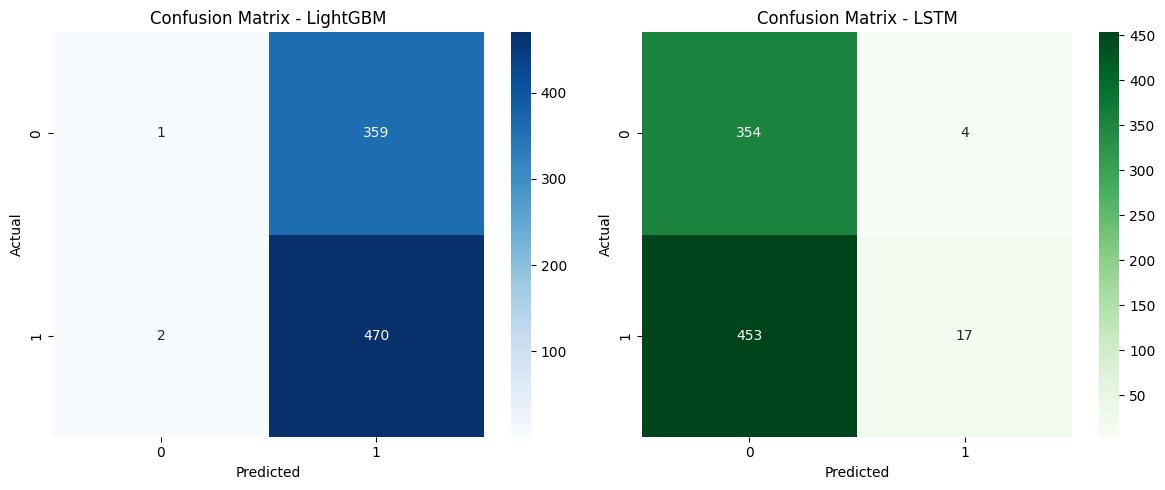

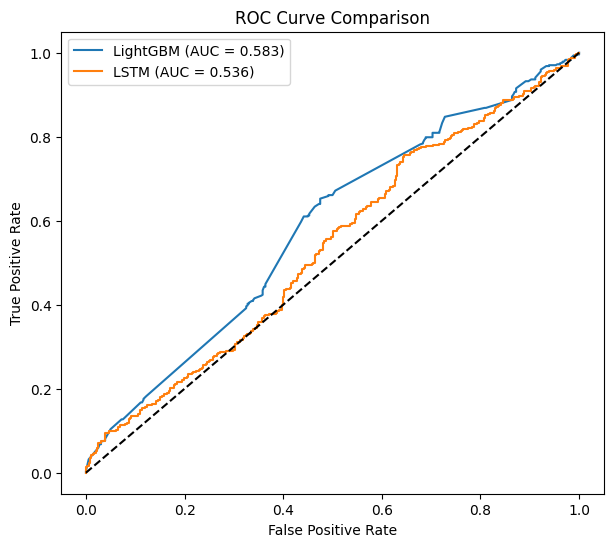

In [63]:
from sklearn.metrics import roc_curve, auc

# ==============================
# 5. Confusion Matrices
# ==============================
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# LightGBM confusion matrix
y_pred_lgb_labels = (y_pred_lgb > 0.5).astype(int)
cm_lgb = confusion_matrix(y_test, y_pred_lgb_labels)
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix - LightGBM")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# LSTM confusion matrix
y_pred_lstm_labels = (y_pred_lstm > 0.5).astype(int)
cm_lstm = confusion_matrix(y_test_seq, y_pred_lstm_labels)
sns.heatmap(cm_lstm, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Confusion Matrix - LSTM")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# ==============================
# 6. ROC Curves
# ==============================
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_lgb)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test_seq, y_pred_lstm)

plt.figure(figsize=(7,6))
plt.plot(fpr_lgb, tpr_lgb, label=f"LightGBM (AUC = {roc_lgb:.3f})")
plt.plot(fpr_lstm, tpr_lstm, label=f"LSTM (AUC = {roc_lstm:.3f})")
plt.plot([0,1], [0,1], 'k--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


CatBoost Classifier

In [65]:
!pip install catboost

In [64]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Train/test split (reuse from before)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# CatBoost Model
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    random_seed=42,
    verbose=100
)

cat_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Predictions
y_pred_cat = cat_model.predict_proba(X_test)[:,1]
roc_cat = roc_auc_score(y_test, y_pred_cat)
print(f"CatBoost ROC AUC: {roc_cat:.4f}")

# Classification Report
y_pred_cat_labels = (y_pred_cat > 0.5).astype(int)
print("\nClassification Report (CatBoost):")
print(classification_report(y_test, y_pred_cat_labels))


0:	test: 0.5247911	best: 0.5247911 (0)	total: 50.6ms	remaining: 15.1s
100:	test: 0.5844191	best: 0.5884593 (96)	total: 339ms	remaining: 667ms
200:	test: 0.5962953	best: 0.5981050 (155)	total: 633ms	remaining: 312ms
299:	test: 0.6054173	best: 0.6054643 (297)	total: 933ms	remaining: 0us

bestTest = 0.6054643362
bestIteration = 297

Shrink model to first 298 iterations.
CatBoost ROC AUC: 0.6055

Classification Report (CatBoost):
              precision    recall  f1-score   support

           0       0.55      0.10      0.17       360
           1       0.58      0.94      0.71       472

    accuracy                           0.57       832
   macro avg       0.56      0.52      0.44       832
weighted avg       0.56      0.57      0.48       832



0:	test: 0.5320204	best: 0.5320204 (0)	total: 17.1ms	remaining: 17.1s
100:	test: 0.6610787	best: 0.6610787 (100)	total: 1.74s	remaining: 15.5s
200:	test: 0.6911065	best: 0.6911065 (200)	total: 3.13s	remaining: 12.5s
300:	test: 0.7437248	best: 0.7438201 (299)	total: 3.65s	remaining: 8.46s
400:	test: 0.7721348	best: 0.7721348 (399)	total: 4.09s	remaining: 6.11s
500:	test: 0.7894208	best: 0.7894208 (500)	total: 4.64s	remaining: 4.62s
600:	test: 0.7982143	best: 0.7982143 (600)	total: 5.35s	remaining: 3.55s
700:	test: 0.8036051	best: 0.8037822 (698)	total: 6.6s	remaining: 2.81s
800:	test: 0.8116698	best: 0.8116698 (800)	total: 7.67s	remaining: 1.91s
900:	test: 0.8140848	best: 0.8146150 (891)	total: 8.63s	remaining: 948ms
999:	test: 0.8175801	best: 0.8178416 (995)	total: 9.06s	remaining: 0us

bestTest = 0.8178415942
bestIteration = 995

Shrink model to first 996 iterations.

CatBoost ROC AUC: 0.8178

Classification Report (CatBoost):
              precision    recall  f1-score   support

   

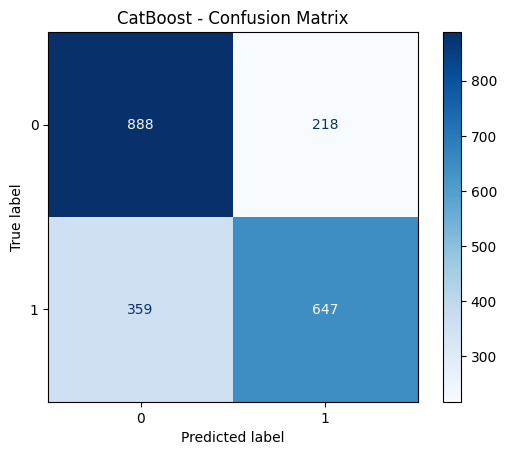


Top Features:
  Feature  Importance
0    open   38.707120
3   close   37.653928
4  volume    8.538166
7     day    5.654624
6   month    3.540190
5    year    2.235562
2     low    2.014698
1    high    1.655712


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# --- Load Data ---
df = pd.read_csv('/content/archive.zip')

# --- Feature Engineering ---
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(columns=['date'], inplace=True)

# Features & Target
X = df.drop(columns=['profit or not'])
y = df['profit or not']

# --- Stratified Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- CatBoost Model ---
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    random_seed=42,
    l2_leaf_reg=3,
    verbose=100
)

# Train with Early Stopping
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

# --- Predictions ---
y_pred_proba = cat_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)

# --- Metrics ---
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nCatBoost ROC AUC: {roc_auc:.4f}")
print("\nClassification Report (CatBoost):")
print(classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("CatBoost - Confusion Matrix")
plt.show()

# --- Feature Importance ---
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': cat_model.get_feature_importance()
}).sort_values(by='Importance', ascending=False)

print("\nTop Features:")
print(feature_importances)


 Tune CatBoost

In [74]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
import numpy as np

best_model = None
best_score = 0

for depth in [4, 6, 8]:
    for lr in [0.03, 0.05, 0.1]:
        model = CatBoostClassifier(
            iterations=2000,
            learning_rate=lr,
            depth=depth,
            l2_leaf_reg=3,
            eval_metric='AUC',
            random_seed=42,
            verbose=False
        )
        model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100)
        preds = model.predict_proba(X_test)[:, 1]
        score = roc_auc_score(y_test, preds)
        print(f"Depth={depth}, LR={lr} → ROC AUC={score:.4f}")
        if score > best_score:
            best_score = score
            best_model = model

print(f"\n Best CatBoost ROC AUC: {best_score:.4f}")


Depth=4, LR=0.03 → ROC AUC=0.8207
Depth=4, LR=0.05 → ROC AUC=0.8324
Depth=4, LR=0.1 → ROC AUC=0.8441
Depth=6, LR=0.03 → ROC AUC=0.8234
Depth=6, LR=0.05 → ROC AUC=0.8299
Depth=6, LR=0.1 → ROC AUC=0.8302
Depth=8, LR=0.03 → ROC AUC=0.8066
Depth=8, LR=0.05 → ROC AUC=0.8103
Depth=8, LR=0.1 → ROC AUC=0.8194

 Best CatBoost ROC AUC: 0.8441


Logistic Regression Classification


===== Logistic Regression Classification Report =====
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1123
           1       0.87      1.00      0.93       989

    accuracy                           0.93      2112
   macro avg       0.93      0.93      0.93      2112
weighted avg       0.94      0.93      0.93      2112

ROC AUC Score: 0.9859865465805067


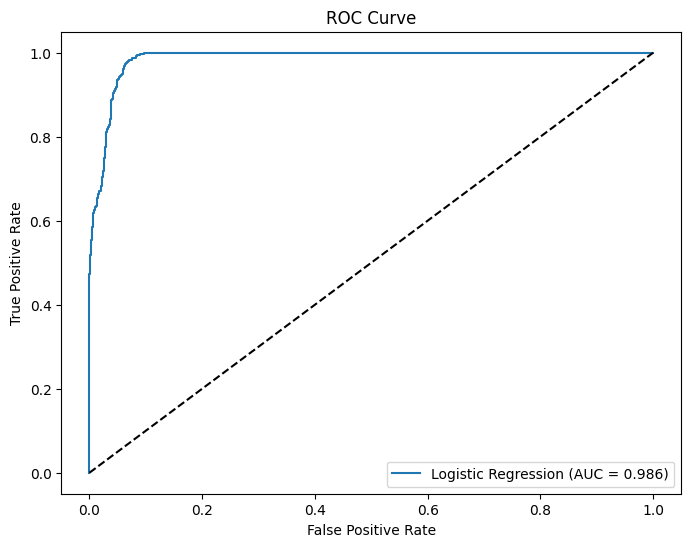

In [91]:
# Logistic Regression Classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize Logistic Regression with increased iterations and random state for reproducibility
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
log_reg.fit(X_train_scaled, y_train)

# Predict labels and probabilities
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Classification report
print("\n===== Logistic Regression Classification Report =====")
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [92]:
import pickle
pickle.dump(log_reg, open('log_reg_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
